# ANALISIS FORECAST - Sesión 01

- Expositor: César Manuel Quezada Balcazar
- Email: cesar.quezada@dmc.pe
- LinkedIn: www.linkedin.com/in/quezada7ba19382
- Tema: Modelos de Pronostico - Series de Tiempo

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
path = '/gdrive/MyDrive/BQ - Data Science/BQ - Repositorios/DMC/Forecast/'

**Importamos los módulos necesarios**

comentando el script

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import matplotlib as mpl
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

**Leemos nuestra serie de tiempo desde un archvo csv**

In [ ]:
co2 = pd.read_csv(path + "co2.csv", sep = ';')

In [ ]:
co2.head(5)

,CO2,Year&Month,Year,Month
0,333.13,1974.38,1974,5
1,332.09,1974.46,1974,6
2,331.10,1974.54,1974,7
3,329.14,1974.63,1974,8
4,327.36,1974.71,1974,9


In [ ]:
co2.shape

(161, 4)

In [ ]:
# Generamos la variable fecha para formar nuestra serie de tiempo
co2['fecha'] = co2.Year.astype(str) + str('-') + co2.Month.astype(str) + str('-1')

In [ ]:
co2.head(5)

,CO2,Year&Month,Year,Month,fecha
0,333.13,1974.38,1974,5,1974-5-1
1,332.09,1974.46,1974,6,1974-6-1
2,331.10,1974.54,1974,7,1974-7-1
3,329.14,1974.63,1974,8,1974-8-1
4,327.36,1974.71,1974,9,1974-9-1


In [ ]:
# transformar al tipo de variable temporal: datatime
co2.fecha = pd.to_datetime(co2.fecha)

In [ ]:
co2.dtypes

CO2                  float64
Year&Month           float64
Year                   int64
Month                  int64
fecha         datetime64[ns]
dtype: object

In [ ]:
co2.head()

,CO2,Year&Month,Year,Month,fecha
0,333.13,1974.38,1974,5,1974-05-01
1,332.09,1974.46,1974,6,1974-06-01
2,331.10,1974.54,1974,7,1974-07-01
3,329.14,1974.63,1974,8,1974-08-01
4,327.36,1974.71,1974,9,1974-09-01


**Graficamos la serie de tiempo**

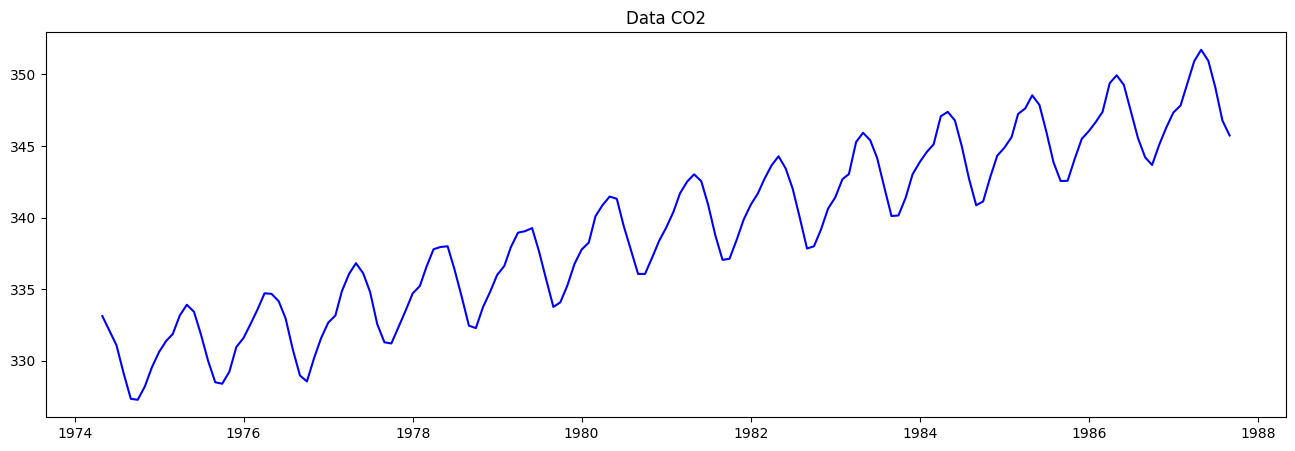

In [ ]:
plt.figure(figsize = (16,5), dpi = 100)
plt.plot(co2.fecha, co2.CO2, color = 'blue')
plt.title('Data CO2')
plt.show()

In [ ]:
# Es creciente y estacionaria (ciclica)

**Graficamos las cajas agregadas**

Hacemos el analisis a nivel mensual

<Axes: xlabel='Month', ylabel='CO2'>

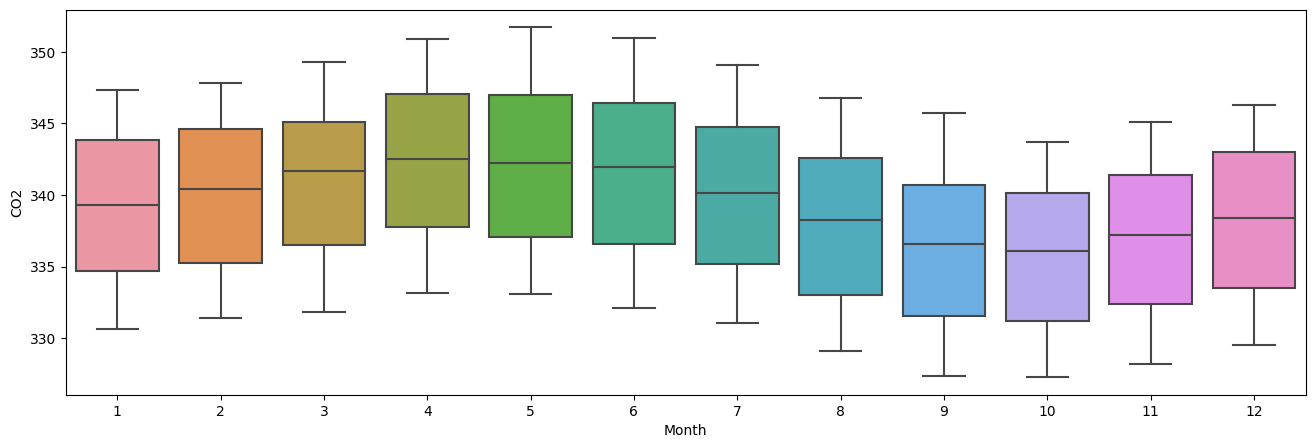

In [ ]:
# Analizando las cajas agregadas
plt.figure(figsize = (16,5), dpi = 100)
sns.boxplot(x = 'Month', y = 'CO2', data = co2)

In [ ]:
# Observamos que se forma el ciclo. Crece hasta junio aprox y luego baja hasta noviembre para volver a crecer desde diciembre
# Se puede dar por la produccion anual que por lo general se da a inicio de año con los presupuestos anuales
# No se ve presencia de atipicos

<Axes: xlabel='Month', ylabel='CO2'>

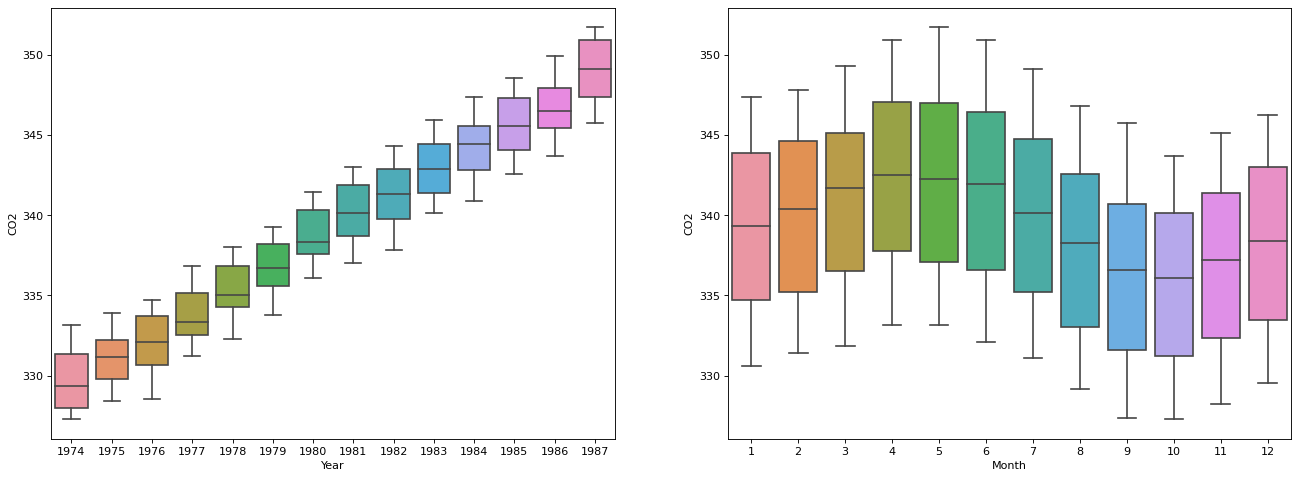

In [ ]:
# Analizando las cajas agregadas (2)
fig, axes = plt.subplots(1,2, figsize = (20,7), dpi = 80)
sns.boxplot(x = 'Year', y = 'CO2', data = co2, ax = axes[0])
sns.boxplot(x = 'Month', y = 'CO2', data = co2, ax = axes[1])

In [ ]:
# Se puede ver la serie creciente por año y la serie ciclica por mes

Mejorando periodos

In [ ]:
co2.head()

,CO2,Year&Month,Year,Month,fecha
0,333.13,1974.38,1974,5,1974-05-01
1,332.09,1974.46,1974,6,1974-06-01
2,331.10,1974.54,1974,7,1974-07-01
3,329.14,1974.63,1974,8,1974-08-01
4,327.36,1974.71,1974,9,1974-09-01


In [ ]:
# asignando indices para un mejor análisis
co2.set_index('fecha', inplace = True)

In [ ]:
co2.head()

,CO2,Year&Month,Year,Month
fecha,,,,
1974-05-01,333.13,1974.38,1974,5
1974-06-01,332.09,1974.46,1974,6
1974-07-01,331.10,1974.54,1974,7
1974-08-01,329.14,1974.63,1974,8
1974-09-01,327.36,1974.71,1974,9


Agrupando a nivel de años y trimestres

In [ ]:
co2_year = co2.resample('Y').mean()
co2_quarter = co2.resample('Q').mean()

In [ ]:
co2_year.head()

,CO2,Year&Month,Year,Month
fecha,,,,
1974-12-31,329.736250,1974.668750,1974.0,8.5
1975-12-31,331.118333,1975.501667,1975.0,6.5
1976-12-31,332.035833,1976.501667,1976.0,6.5
1977-12-31,333.788333,1977.501667,1977.0,6.5
1978-12-31,335.364167,1978.501667,1978.0,6.5


In [ ]:
co2_quarter.head(14)

,CO2,Year&Month,Year,Month
fecha,,,,
1974-06-30,332.610000,1974.420000,1974.0,5.5
1974-09-30,329.200000,1974.626667,1974.0,8.0
1974-12-31,328.356667,1974.876667,1974.0,11.0
1975-03-31,331.296667,1975.126667,1975.0,2.0
1975-06-30,333.510000,1975.376667,1975.0,5.0
1975-09-30,330.123333,1975.626667,1975.0,8.0
1975-12-31,329.543333,1975.876667,1975.0,11.0
1976-03-31,332.590000,1976.126667,1976.0,2.0
1976-06-30,334.523333,1976.376667,1976.0,5.0


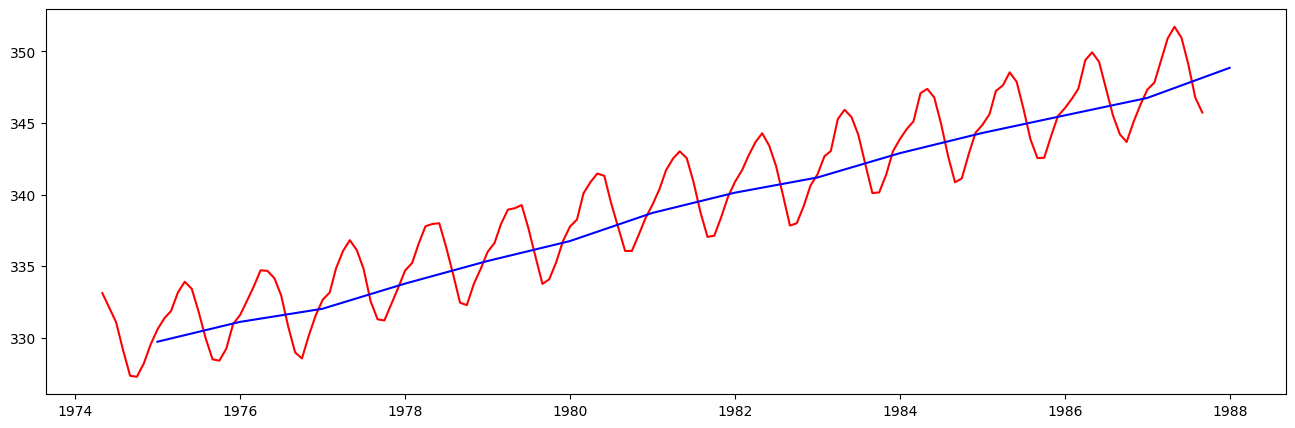

In [ ]:
plt.figure(figsize = (16,5), dpi = 100)
plt.plot(co2.CO2, color = 'red')
plt.plot(co2_year.CO2, color = 'blue')

In [ ]:
# roja: serie original
# azul: serie anual con promedios